패키지 참조 -> 데이터 셋 준비 -> 데이터 전처리 -> 탐색적 데이터 분석 -> 데이터 셋 분할 -> 모델 개발 -> 학습 결과 평가 -> 학습 결과 적용

![res/code.png](res/code.png)

# 퍼셉트론

## #01. 퍼셉트론의 이해

- 인공신경망(딥러닝)의 기원이 되는 알고리즘.
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output를 출력한다.
- 퍼셉트론은 `1`과 `0`의 신호만 가질 수 있다.
- 신호가 흐르면 `1`, 흐르지 않으면 `0`이다.

### 1. input이 2개인 퍼셉트론

- $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치를 의미한다. ($w$ : weight)
- $**x$와 가중치 $w$를 곱한 값을 모두 더하여 하나의 값($y$)로 만들어 낸다.**
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 1로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 **활성화 함수**라고 한다.
- 입력 신호와 출력 신호를 담고있는 원은 **노드** 혹은 **뉴런**이라 부른다.

![퍼셉트론](res/per.png)

#### y를 수식으로 나타내기

$$y = \left \{ \begin{array}{cc} {0(w_1x_1 + w_2x_2 \leq \theta)}\\{1(w_1x_1 + w_2x_2 > \theta)}\end{array} \right.$$

### 2. 논리회로

- 논리 연산을 통해 전기 장치를 제어하는 통로.
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다.
- 불 대수를 이용하여 설계
- 여러 입력을 해도 1개의 출력만 나온다.

![논리회로](res/logic.png)

### 3. 게이트

- 논리 회로의 기초 구성요소.
- 각 게이트는 논리 연산 하나를 구현한다.

![게이트](res/gate.jpg)

#### 게이트의 종류

![게이트의 종류](res/gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.

## #02. 퍼셉트론 구현하기

### 1. 패키지 참조하기

In [30]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2. AND 게이트

#### 1) 데이터 셋 준비하기

##### 랜덤 시드값 고정

In [31]:
# random.seed를 고정해 실행할 때마다 동일한 결과 값을 유동
np.random.seed(777)

##### 데이터 셋 구성

In [32]:
# 2차원 데이터를 array로 2차원 데이터 셋으로 설정
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [0], [0], [1]])

#### 3) 데이터 전처리

- 데이터 양이 적으므로 이 예제에서는 제외.

#### 4) 탐색적 데이터 분석

In [33]:
# flatten : 무조건 1차원으로
# reshape : 차원 변경
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


#### 5) 데이터 셋 분할

> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 제외.

#### 6) 모델 개발

##### 모델 정의

model = Sequential()

In [34]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) #activation은 모델과 분석 종류에 따라서 다름
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 학습하기

epochs

여러번 돌리면 모델의 학습 중첩 효과 발생

모델과 학습을 별도의 cell에 작성하는 것이 용이 -> model cell을 동작하면 학습 모델이 초기화되기 때문

In [35]:
# epochs는 학습 횟수 -> 많을 수록 성능 향상
hist = model.fit(train_x, train_y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 315ms/step - loss: 0.4907 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4820 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4737 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4656 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4580 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4506 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4435 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4367 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4301 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4238 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.417

1/1 [==============================] - 0s 7ms/step - loss: 0.3547 - acc: 0.7500
Epoch 25/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3507 - acc: 0.7500
Epoch 26/500
1/1 [==============================] - 0s 11ms/step - loss: 0.3469 - acc: 0.7500
Epoch 27/500
1/1 [==============================] - 0s 9ms/step - loss: 0.3432 - acc: 0.7500
Epoch 28/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3396 - acc: 0.7500
Epoch 29/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3361 - acc: 0.7500
Epoch 30/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - acc: 0.7500
Epoch 31/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3292 - acc: 0.7500
Epoch 32/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3260 - acc: 0.7500
Epoch 33/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3227 - acc: 0.7500
Epoch 34/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3196 - a

In [36]:
# 학습 모델의 DF화
result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1 #0부터 시작하기 때문에 +1
result_df.set_index('epochs', inplace=True)
result_df

,loss,acc
epochs,,
1,0.490727,0.75
2,0.482008,0.75
3,0.473656,0.75
4,0.465648,0.75
5,0.457966,0.75
...,...,...
496,0.064982,1.00
497,0.064958,1.00
498,0.064933,1.00


#### 7) 학습 결과 평가

##### 평가결과 시각화

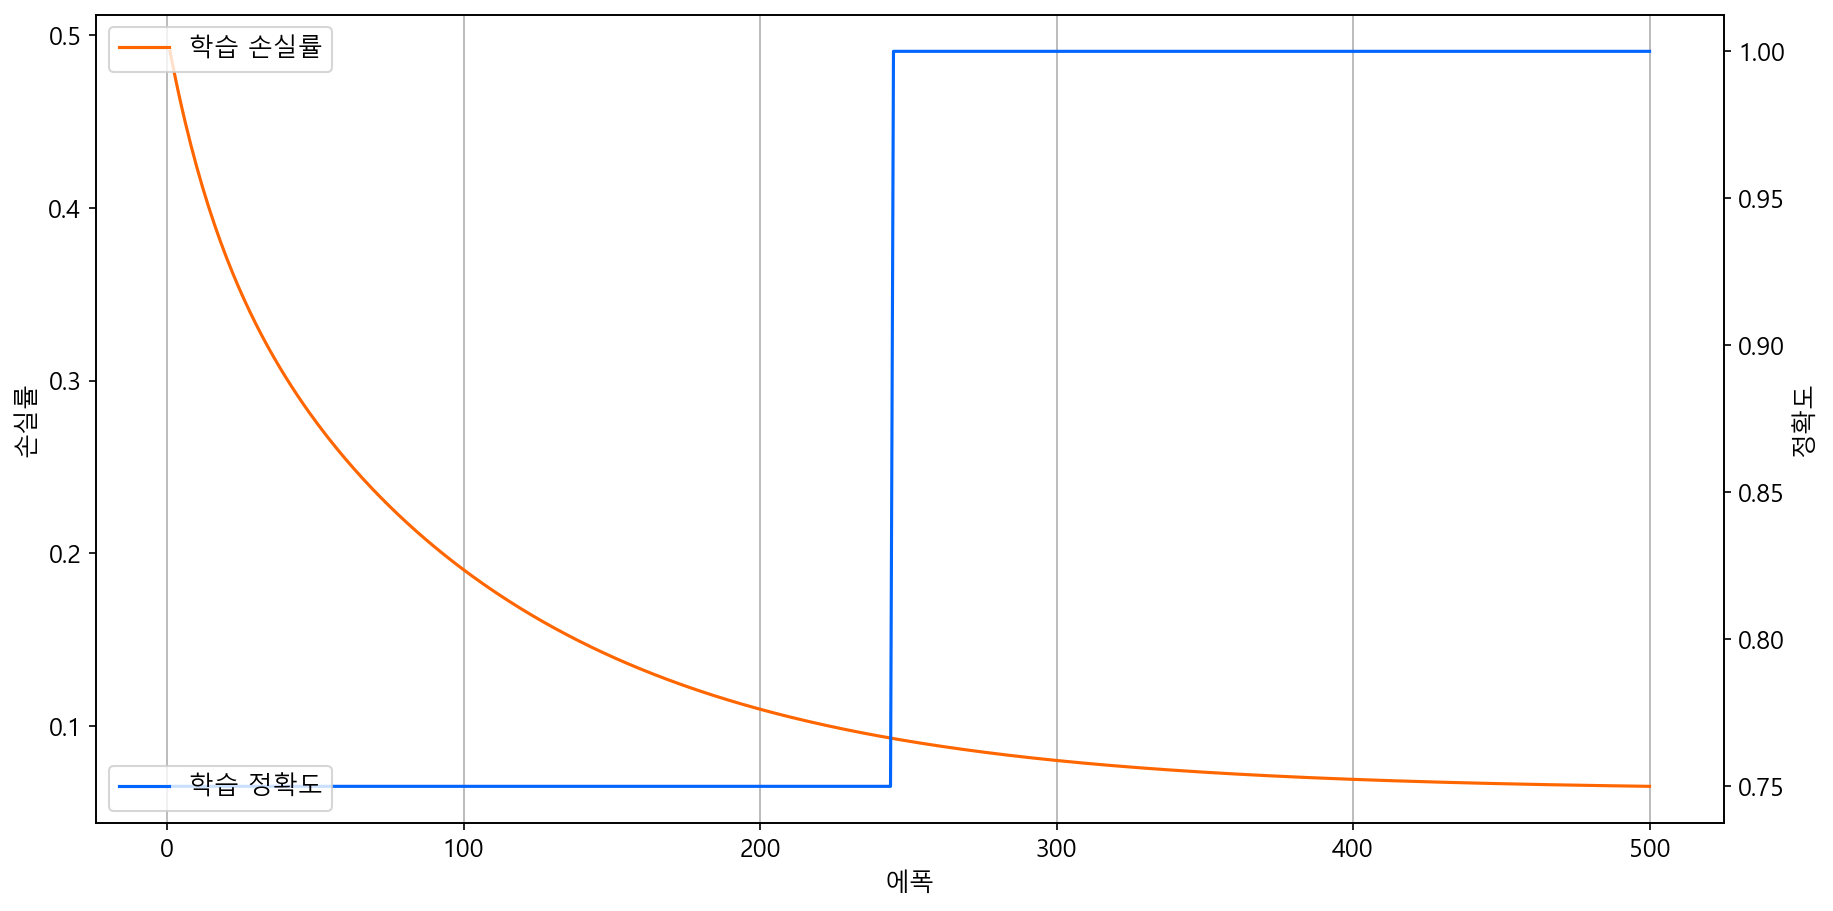

In [37]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1,1,figsize=(14,7), dpi=150)  #DotperInch
ax2 = ax1.twinx()

# 손실률 시각화
sb.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')    #label 위치 지정 및 시각화
ax1.grid(axis='x')

# 정확도 시각화
sb.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')    #label 위치 지정 및 시각화

plt.show()
plt.close()

##### 모델 성능 평가

In [38]:
ev = model.evaluate(train_x, train_y)
# ev
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0]*100, ev[1]*100))

1/1 [==============================] - 0s 117ms/step - loss: 0.0649 - acc: 1.0000
손실률: 6.49%, 정확도: 100.00%


##### 가중치, 편향 확인

In [39]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.5545535  0.41968754]
편향: [-0.23472303]


#### 8) 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정

In [40]:
r00 = model.predict([[0, 0]])
r00

1/1 [==============================] - 0s 70ms/step


array([[-0.23472303]], dtype=float32)

In [41]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

##### 학습 데이터 전체를 활용하여 예측값 만들기

In [42]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 28ms/step


array([[-0.23472303],
       [ 0.31983048],
       [ 0.18496451],
       [ 0.739518  ]], dtype=float32)

In [43]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### 3. OR 게이트(실습)

#### 1) 데이터 셋 준비

##### 랜덤 시드값 고정

In [44]:
np.random.seed(777)

##### 데이터 셋 구성

In [45]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [1], [1], [1]])

#### 3) 데이터 전처리

- 데이터가 적어서 이 예제에서는 제외.

#### 4) 탐색적 데이터 분석

In [46]:
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


#### 5) 데이터 셋 분할하기

> 데이터 양이 적기 때문에 여기서는 제외.

#### 6) 모델 개발

##### 모델 정의

In [47]:
model = Sequential()
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) #activation은 모델과 분석 종류에 따라서 다름
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 학습

epochs

여러번 돌리면 모델의 학습 중첩 효과 발생

모델과 학습을 별도의 cell에 작성하는 것이 용이 -> model cell을 동작하면 학습 모델이 초기화되기 때문

In [48]:
hist = model.fit(train_x, train_y, epochs=500)

Epoch 1/500


1/1 [==============================] - 0s 390ms/step - loss: 0.2215 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2116 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2023 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1935 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1853 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1777 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1705 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1637 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1574 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1515 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1459 - acc: 0.7

In [49]:
result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,acc
epochs,,
1,0.221521,0.5
2,0.211579,0.5
3,0.202260,0.5
4,0.193525,0.5
5,0.185338,0.5
...,...,...
496,0.062505,1.0
497,0.062505,1.0
498,0.062505,1.0


#### 7) 학습 결과 평가

##### 평가결과 시각화

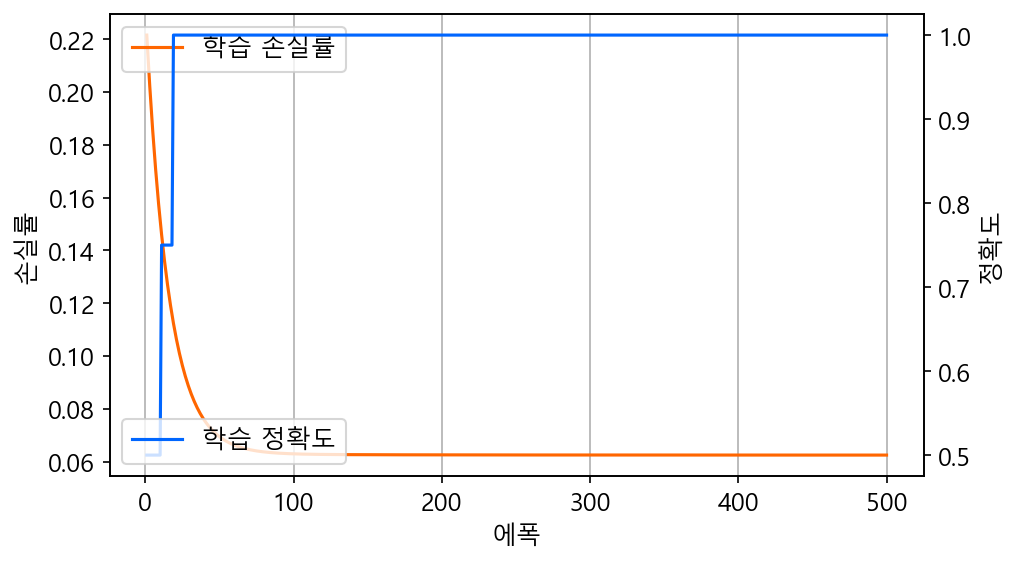

In [50]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(7, 4), dpi=150)  #DotperInch
ax2 = ax1.twinx()

sb.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sb.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

##### 모델 성능 평가

In [51]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

1/1 [==============================] - 0s 125ms/step - loss: 0.0625 - acc: 1.0000
손실률: 0.06, 정확도: 1.00


##### 가중치, 편향 확인

In [52]:
weight, bias = model.get_weights()
weight

print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.50413465 0.4987917 ]
편향: [0.24826436]


#### 8) 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정

In [53]:
r00 = model.predict([[0, 1]])
r00

1/1 [==============================] - 0s 87ms/step


array([[0.74705607]], dtype=float32)

In [54]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => True'

##### 학습 데이터 전체를 활용하여 예측값 만들기

In [55]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 32ms/step


array([[0.24826436],
       [0.752399  ],
       [0.74705607],
       [1.2511907 ]], dtype=float32)

In [56]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
